In [36]:
import pandas as pd
import numpy as np
import umap
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt
from skbio.diversity.alpha import faith_pd
from skbio.diversity.alpha import shannon
from skbio import TreeNode

# Plot UMAP (separate vendors)

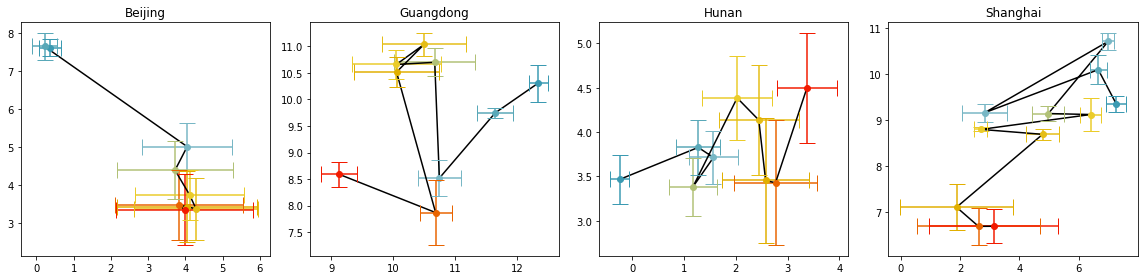

In [80]:
df_meta = pd.read_csv('../../our_data/meta_data.csv',index_col=0)
df_bac = pd.read_csv('../../our_data/16S_relative_abundance_asv.csv',index_col=0).T
asvs = list(df_bac.columns)
df = pd.merge(df_meta, df_bac, left_index=True, right_index=True, how='inner')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,4))

colors = {0:'#3B9AB2',1:'#59A8B8',2:'#78B7C5',3:'#78B7C5',5:'#B1C177',8:'#EBCC2A',10:'#EBCC2A',13:'#E5BD15',19:'#E1AF00',25:'#E96400',31:'#F21A00'}
for k,vendor in enumerate(['Beijing','Guangdong','Hunan','Shanghai']):
    df_tmp = df[df.Vendor==vendor]
    fit = umap.UMAP(random_state=0)
    u = fit.fit_transform(df_tmp[asvs].values)
    coef = pd.DataFrame(u, index=df_tmp.index, columns=['UMAP 1','UMAP 2'])
    df_coef = pd.merge(df_meta, coef, left_index=True, right_index=True, how='inner').sort_values(by='Day')
    umap_mean = df_coef.groupby(['Day']).agg(np.mean)
    umap_se = df_coef.groupby(['Day']).agg(sem)
    ax[k].plot(umap_mean['UMAP 1'], umap_mean['UMAP 2'], 'k-')  
    for day in [0,1,2,3,5,8,10,13,19,25,31]:
        if day in list(umap_mean.index):
            ax[k].plot(umap_mean.loc[day,'UMAP 1'], umap_mean.loc[day,'UMAP 2'], 'o', color=colors[day], markerfacecolor=colors[day])
            ax[k].errorbar(umap_mean.loc[day,'UMAP 1'], umap_mean.loc[day,'UMAP 2'], 
                           yerr=umap_se.loc[day,'UMAP 2'], xerr=umap_se.loc[day,'UMAP 1'],
                           fmt='', capsize=8, barsabove=False, capthick=None, ecolor=colors[day])
    ax[k].set_title(vendor)
    
plt.tight_layout()

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("microbiome_trajectory_umap_vendor_separate.svg", format="svg")

# Plot UMAP (combine all vendors)

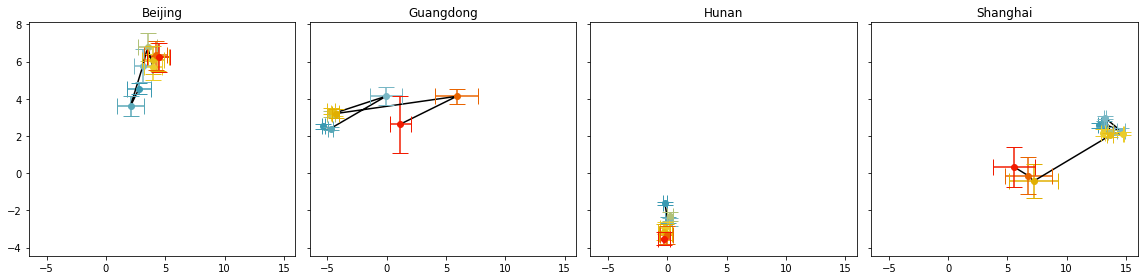

In [81]:
df_meta = pd.read_csv('../../our_data/meta_data.csv',index_col=0)
df_bac = pd.read_csv('../../our_data/16S_relative_abundance_asv.csv',index_col=0).T
asvs = list(df_bac.columns)
df = pd.merge(df_meta, df_bac, left_index=True, right_index=True, how='inner')

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,4), sharex=True, sharey=True)

colors = {0:'#3B9AB2',1:'#59A8B8',2:'#78B7C5',3:'#78B7C5',5:'#B1C177',8:'#EBCC2A',10:'#EBCC2A',13:'#E5BD15',19:'#E1AF00',25:'#E96400',31:'#F21A00'}
fit = umap.UMAP(random_state=0)
u = fit.fit_transform(df[asvs].values)
coef = pd.DataFrame(u, index=df.index, columns=['UMAP 1','UMAP 2'])
df_coef = pd.merge(df_meta, coef, left_index=True, right_index=True, how='inner').sort_values(by='Day')
for k,vendor in enumerate(['Beijing','Guangdong','Hunan','Shanghai']):
    df_tmp = df_coef[df_coef.Vendor==vendor]
    umap_mean = df_tmp.groupby(['Day']).agg(np.mean)
    umap_se = df_tmp.groupby(['Day']).agg(sem)
    ax[k].plot(umap_mean['UMAP 1'], umap_mean['UMAP 2'], 'k-')  
    for day in [0,1,2,3,5,8,10,13,19,25,31]:
        if day in list(umap_mean.index):
            ax[k].plot(umap_mean.loc[day,'UMAP 1'], umap_mean.loc[day,'UMAP 2'], 'o', color=colors[day], markerfacecolor=colors[day])
            ax[k].errorbar(umap_mean.loc[day,'UMAP 1'], umap_mean.loc[day,'UMAP 2'], 
                           yerr=umap_se.loc[day,'UMAP 2'], xerr=umap_se.loc[day,'UMAP 1'],
                           fmt='', capsize=8, barsabove=False, capthick=None, ecolor=colors[day])
    ax[k].set_title(vendor)
    
plt.tight_layout()

plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("microbiome_trajectory_umap_vendor_combined.svg", format="svg")